In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Task_1: Function that returns [du/dt, dv/dt]

In [3]:
def toggle_switch_model(t, state, par):
    '''Calculate derivatives for the genetic toggle switch system.'''
    u, v = state
    alpha, beta, n = par
    dudt = alpha/(1 + v**n) - u
    dvdt = beta/(1 + u**n) - v
    return [dudt, dvdt]

### Task_2: Simulation

In [4]:
alpha_sim = 5
beta_sim = 5
n_sim = 4
par_sim = [alpha_sim, beta_sim, n_sim]
print(f"alpha: {alpha_sim} \nbeta: {beta_sim} \nHill coefficient: {n_sim}")

# Time grid
t_max=50
t_span = [0, t_max]
t_eval = np.linspace(t_span[0], t_span[1], t_max, 500)

# Initial condition
state_cond0 = (4, 0) 
state_cond1 = (0, 4) 

# Simulation
sol_cond0 = solve_ivp(toggle_switch_model,
                      t_span,
                      state_cond0,
                      args=(par_sim,),
                      t_eval=t_eval)
sol_cond1 = solve_ivp(toggle_switch_model,
                      t_span,
                      state_cond1,
                      args=(par_sim,),
                      t_eval=t_eval)

alpha: 5 
beta: 5 
Hill coefficient: 4


### Task_3: Visualization

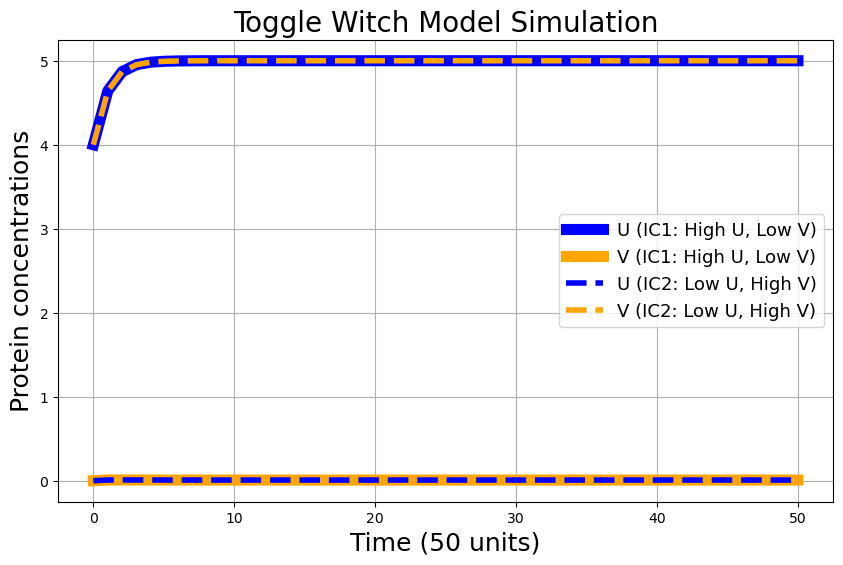

In [5]:
plt.figure(figsize=(10, 6))
# Condition 1
plt.plot(sol_cond0.t, sol_cond0.y[0],
         color = 'blue', linestyle = '-', linewidth=8,
         label='U (IC1: High U, Low V)')
plt.plot(sol_cond0.t, sol_cond0.y[1],
         color = 'orange', linestyle = '-', linewidth=8,
         label='V (IC1: High U, Low V)')
# Condition 2
plt.plot(sol_cond1.t, sol_cond1.y[0],
         color = 'blue', linestyle = '--', linewidth=4,
         label='U (IC2: Low U, High V)')
plt.plot(sol_cond1.t, sol_cond1.y[1],
         color = 'orange', linestyle = '--', linewidth=4,
         label='V (IC2: Low U, High V)')
plt.xlabel('Time (50 units)', fontsize=18)
plt.ylabel('Protein concentrations', fontsize=18)
plt.title(f'Toggle Witch Model Simulation', fontsize=20)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()


### Task_4: Answers to questions

 1. In both simulations, the system settles into a state where one protein is maintained at high concentration while the other remains at low concentration. Protain concentration of the final state is consistent with that of the initial state.
 
 2. The system is bistable because it has two distinct stable steady states.
 
 3. In the initial condition 1, U has high concentration while V has low concentration, corresponding to gene U being "ON" and gene V being "OFF";
    
    In the initial condition 2, V has high concentration while U has low concentration, corresponding to gene V being "ON" and gene U being "OFF".